In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import pytry
import matplotlib.pyplot as plt
import scipy.stats as stats

# Dimensions Experiment

In [2]:
data_dims = pd.DataFrame(pytry.read('ICCM_dims'))
#data_dims

In [3]:
result_dims = pd.DataFrame({'training (80%)': pd.concat([data_dims.classify_train]), 'testing (20%)': pd.concat([data_dims.classify_test]), 'aimless': pd.concat([data_dims.classify_aim])})
#result_dims

Now let's look at how well the system did on each data set.

Text(0.5,0,'Classification Test')

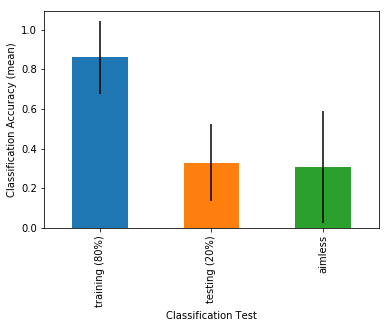

In [4]:
errors = result_dims.std()
ax = result_dims.mean().plot(kind='bar', yerr=errors)
ax.set_ylabel("Classification Accuracy (mean)")
ax.set_xlabel("Classification Test")

In [5]:
print('Mean Accuracy Training Patterns: ', (result_dims["training (80%)"].mean())*100)
print('Mean Accuracy Testing Patterns: ', (result_dims["testing (20%)"].mean())*100)
print('Mean Accuracy Aimless Patterns: ', (result_dims["aimless"].mean())*100)

Mean Accuracy Training Patterns:  86.09926250000005
Mean Accuracy Testing Patterns:  32.89518749999997
Mean Accuracy Aimless Patterns:  30.803524999999986


In [6]:
errors

training (80%)    0.183063
testing (20%)     0.194763
aimless           0.282805
dtype: float64

Next we look at whether the number of dimensions had an effect on accuracy of classification.

Text(0.5,0,'Number of Dimensions')

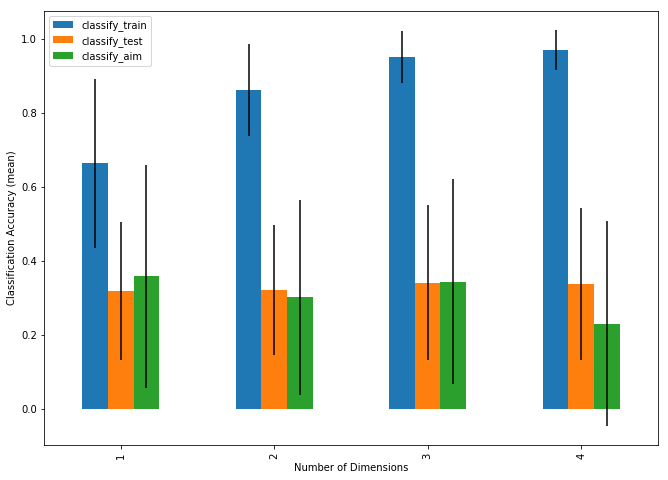

In [7]:
by_dim = data_dims.groupby(['n_dims'])['classify_train','classify_test','classify_aim'].mean()
by_dim_errors = data_dims.groupby(['n_dims'])['classify_train','classify_test','classify_aim'].std()

bx = by_dim.plot(kind='bar', yerr=by_dim_errors, figsize=(11,8)) #plot
bx.set_ylabel("Classification Accuracy (mean)")
bx.set_xlabel("Number of Dimensions")

In [8]:
by_dim

,classify_train,classify_test,classify_aim
n_dims,,,
1,0.662853,0.317826,0.358140
2,0.861587,0.320423,0.300981
3,0.950580,0.340410,0.342863
4,0.968950,0.337148,0.230157


In [9]:
by_dim_errors

,classify_train,classify_test,classify_aim
n_dims,,,
1,0.228308,0.186608,0.300920
2,0.124059,0.176408,0.262697
3,0.071491,0.209612,0.276932
4,0.053869,0.206402,0.275948


In [10]:
stats.f_oneway(data_dims['classify_train'][data_dims['n_dims'] == 1], 
             data_dims['classify_train'][data_dims['n_dims'] == 2],
             data_dims['classify_train'][data_dims['n_dims'] == 3],
             data_dims['classify_train'][data_dims['n_dims'] == 4])

F_onewayResult(statistic=104.04993030917795, pvalue=1.1065635322069949e-49)

In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
mod = ols('classify_train ~ n_dims',
                data=data_dims).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

            sum_sq     df           F        PR(>F)
n_dims    5.073090    1.0  243.316546  3.799554e-43
Residual  8.298202  398.0         NaN           NaN


In [12]:
effect_size = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1]) #eta squared
effect_size

0.3794016349840779

In [13]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(data_dims['classify_train'], data_dims['n_dims'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  1      2     0.1987   0.1486 0.2489  True 
  1      3     0.2877   0.2376 0.3379  True 
  1      4     0.3061   0.256  0.3562  True 
  2      3     0.089    0.0389 0.1391  True 
  2      4     0.1074   0.0572 0.1575  True 
  3      4     0.0184  -0.0318 0.0685 False 
--------------------------------------------


Histogram plots of the actual classification outputs for each pattern type. 
**Note**: this is across the whole experiment.

In [14]:
ax = pd.DataFrame({'aimless': pd.concat([data_dims.accuracy_aim0, data_dims.accuracy_aim1, data_dims.accuracy_aim2, data_dims.accuracy_aim3,
                                        data_dims.accuracy_aim4, data_dims.accuracy_aim5, data_dims.accuracy_aim6, data_dims.accuracy_aim7, 
                                        data_dims.accuracy_aim8, data_dims.accuracy_aim9, data_dims.accuracy_aim10, data_dims.accuracy_aim11, 
                                        data_dims.accuracy_aim12, data_dims.accuracy_aim13, data_dims.accuracy_aim14, data_dims.accuracy_aim15, 
                                        data_dims.accuracy_aim16, data_dims.accuracy_aim17, data_dims.accuracy_aim18, data_dims.accuracy_aim19, 
                                        data_dims.accuracy_aim20, data_dims.accuracy_aim21, data_dims.accuracy_aim22, data_dims.accuracy_aim23, 
                                        data_dims.accuracy_aim24, data_dims.accuracy_aim25, data_dims.accuracy_aim26, data_dims.accuracy_aim27, 
                                        data_dims.accuracy_aim28, data_dims.accuracy_aim29, data_dims.accuracy_aim30, data_dims.accuracy_aim31, 
                                        data_dims.accuracy_aim32, data_dims.accuracy_aim33, data_dims.accuracy_aim34, data_dims.accuracy_aim35, 
                                        data_dims.accuracy_aim36, data_dims.accuracy_aim37, data_dims.accuracy_aim38, data_dims.accuracy_aim39, 
                                        data_dims.accuracy_aim40, data_dims.accuracy_aim41, data_dims.accuracy_aim42, data_dims.accuracy_aim43, 
                                        data_dims.accuracy_aim44, data_dims.accuracy_aim45, data_dims.accuracy_aim46, data_dims.accuracy_aim47, 
                                        data_dims.accuracy_aim48, data_dims.accuracy_aim49, data_dims.accuracy_aim50, data_dims.accuracy_aim51, 
                                        data_dims.accuracy_aim52, data_dims.accuracy_aim53, data_dims.accuracy_aim54, data_dims.accuracy_aim55, 
                                        data_dims.accuracy_aim56, data_dims.accuracy_aim57, data_dims.accuracy_aim58, data_dims.accuracy_aim59, 
                                        data_dims.accuracy_aim60, data_dims.accuracy_aim61, data_dims.accuracy_aim62, data_dims.accuracy_aim63, 
                                        data_dims.accuracy_aim64, data_dims.accuracy_aim65, data_dims.accuracy_aim66, data_dims.accuracy_aim67, 
                                        data_dims.accuracy_aim68, data_dims.accuracy_aim69, data_dims.accuracy_aim70, data_dims.accuracy_aim71, 
                                        data_dims.accuracy_aim72, data_dims.accuracy_aim73, data_dims.accuracy_aim74, data_dims.accuracy_aim75, 
                                        data_dims.accuracy_aim76, data_dims.accuracy_aim77, data_dims.accuracy_aim78, data_dims.accuracy_aim79, 
                                        data_dims.accuracy_aim80, data_dims.accuracy_aim81, data_dims.accuracy_aim82, data_dims.accuracy_aim83, 
                                        data_dims.accuracy_aim84, data_dims.accuracy_aim85, data_dims.accuracy_aim86, data_dims.accuracy_aim87, 
                                        data_dims.accuracy_aim88, data_dims.accuracy_aim89, data_dims.accuracy_aim90, data_dims.accuracy_aim91, 
                                        data_dims.accuracy_aim92, data_dims.accuracy_aim93, data_dims.accuracy_aim94, data_dims.accuracy_aim95, 
                                        data_dims.accuracy_aim96, data_dims.accuracy_aim97, data_dims.accuracy_aim98, data_dims.accuracy_aim99])})

gtrx = pd.DataFrame({'goal_train': pd.concat([data_dims.accuracy_train0, data_dims.accuracy_train1, data_dims.accuracy_train2, data_dims.accuracy_train3,
                                        data_dims.accuracy_train4, data_dims.accuracy_train5, data_dims.accuracy_train6, data_dims.accuracy_train7, 
                                        data_dims.accuracy_train8, data_dims.accuracy_train9, data_dims.accuracy_train10, data_dims.accuracy_train11, 
                                        data_dims.accuracy_train12, data_dims.accuracy_train13, data_dims.accuracy_train14, data_dims.accuracy_train15, 
                                        data_dims.accuracy_train16, data_dims.accuracy_train17, data_dims.accuracy_train18, data_dims.accuracy_train19, 
                                        data_dims.accuracy_train20, data_dims.accuracy_train21, data_dims.accuracy_train22, data_dims.accuracy_train23, 
                                        data_dims.accuracy_train24, data_dims.accuracy_train25, data_dims.accuracy_train26, data_dims.accuracy_train27, 
                                        data_dims.accuracy_train28, data_dims.accuracy_train29, data_dims.accuracy_train30, data_dims.accuracy_train31, 
                                        data_dims.accuracy_train32, data_dims.accuracy_train33, data_dims.accuracy_train34, data_dims.accuracy_train35, 
                                        data_dims.accuracy_train36, data_dims.accuracy_train37, data_dims.accuracy_train38, data_dims.accuracy_train39, 
                                        data_dims.accuracy_train40, data_dims.accuracy_train41, data_dims.accuracy_train42, data_dims.accuracy_train43, 
                                        data_dims.accuracy_train44, data_dims.accuracy_train45, data_dims.accuracy_train46, data_dims.accuracy_train47, 
                                        data_dims.accuracy_train48, data_dims.accuracy_train49, data_dims.accuracy_train50, data_dims.accuracy_train51, 
                                        data_dims.accuracy_train52, data_dims.accuracy_train53, data_dims.accuracy_train54, data_dims.accuracy_train55, 
                                        data_dims.accuracy_train56, data_dims.accuracy_train57, data_dims.accuracy_train58, data_dims.accuracy_train59, 
                                        data_dims.accuracy_train60, data_dims.accuracy_train61, data_dims.accuracy_train62, data_dims.accuracy_train63, 
                                        data_dims.accuracy_train64, data_dims.accuracy_train65, data_dims.accuracy_train66, data_dims.accuracy_train67, 
                                        data_dims.accuracy_train68, data_dims.accuracy_train69, data_dims.accuracy_train70, data_dims.accuracy_train71, 
                                        data_dims.accuracy_train72, data_dims.accuracy_train73, data_dims.accuracy_train74, data_dims.accuracy_train75, 
                                        data_dims.accuracy_train76, data_dims.accuracy_train77, data_dims.accuracy_train78, data_dims.accuracy_train79, 
                                        data_dims.accuracy_train80, data_dims.accuracy_train81, data_dims.accuracy_train82, data_dims.accuracy_train83, 
                                        data_dims.accuracy_train84, data_dims.accuracy_train85, data_dims.accuracy_train86, data_dims.accuracy_train87, 
                                        data_dims.accuracy_train88, data_dims.accuracy_train89, data_dims.accuracy_train90, data_dims.accuracy_train91, 
                                        data_dims.accuracy_train92, data_dims.accuracy_train93, data_dims.accuracy_train94, data_dims.accuracy_train95, 
                                        data_dims.accuracy_train96, data_dims.accuracy_train97, data_dims.accuracy_train98, data_dims.accuracy_train99])})

gtsx = pd.DataFrame({'goal_test': pd.concat([data_dims.accuracy_test0, data_dims.accuracy_test1, data_dims.accuracy_test2, data_dims.accuracy_test3,
                                        data_dims.accuracy_test4, data_dims.accuracy_test5, data_dims.accuracy_test6, data_dims.accuracy_test7, 
                                        data_dims.accuracy_test8, data_dims.accuracy_test9, data_dims.accuracy_test10, data_dims.accuracy_test11, 
                                        data_dims.accuracy_test12, data_dims.accuracy_test13, data_dims.accuracy_test14, data_dims.accuracy_test15, 
                                        data_dims.accuracy_test16, data_dims.accuracy_test17, data_dims.accuracy_test18, data_dims.accuracy_test19, 
                                        data_dims.accuracy_test20, data_dims.accuracy_test21, data_dims.accuracy_test22, data_dims.accuracy_test23, 
                                        data_dims.accuracy_test24, data_dims.accuracy_test25, data_dims.accuracy_test26, data_dims.accuracy_test27, 
                                        data_dims.accuracy_test28, data_dims.accuracy_test29, data_dims.accuracy_test30, data_dims.accuracy_test31, 
                                        data_dims.accuracy_test32, data_dims.accuracy_test33, data_dims.accuracy_test34, data_dims.accuracy_test35, 
                                        data_dims.accuracy_test36, data_dims.accuracy_test37, data_dims.accuracy_test38, data_dims.accuracy_test39, 
                                        data_dims.accuracy_test40, data_dims.accuracy_test41, data_dims.accuracy_test42, data_dims.accuracy_test43, 
                                        data_dims.accuracy_test44, data_dims.accuracy_test45, data_dims.accuracy_test46, data_dims.accuracy_test47, 
                                        data_dims.accuracy_test48, data_dims.accuracy_test49, data_dims.accuracy_test50, data_dims.accuracy_test51, 
                                        data_dims.accuracy_test52, data_dims.accuracy_test53, data_dims.accuracy_test54, data_dims.accuracy_test55, 
                                        data_dims.accuracy_test56, data_dims.accuracy_test57, data_dims.accuracy_test58, data_dims.accuracy_test59, 
                                        data_dims.accuracy_test60, data_dims.accuracy_test61, data_dims.accuracy_test62, data_dims.accuracy_test63, 
                                        data_dims.accuracy_test64, data_dims.accuracy_test65, data_dims.accuracy_test66, data_dims.accuracy_test67, 
                                        data_dims.accuracy_test68, data_dims.accuracy_test69, data_dims.accuracy_test70, data_dims.accuracy_test71, 
                                        data_dims.accuracy_test72, data_dims.accuracy_test73, data_dims.accuracy_test74, data_dims.accuracy_test75, 
                                        data_dims.accuracy_test76, data_dims.accuracy_test77, data_dims.accuracy_test78, data_dims.accuracy_test79, 
                                        data_dims.accuracy_test80, data_dims.accuracy_test81, data_dims.accuracy_test82, data_dims.accuracy_test83, 
                                        data_dims.accuracy_test84, data_dims.accuracy_test85, data_dims.accuracy_test86, data_dims.accuracy_test87, 
                                        data_dims.accuracy_test88, data_dims.accuracy_test89, data_dims.accuracy_test90, data_dims.accuracy_test91, 
                                        data_dims.accuracy_test92, data_dims.accuracy_test93, data_dims.accuracy_test94, data_dims.accuracy_test95, 
                                        data_dims.accuracy_test96, data_dims.accuracy_test97, data_dims.accuracy_test98, data_dims.accuracy_test99])})

ntrx = pd.DataFrame({'noplay_train': pd.concat([data_dims.accuracy_train100, data_dims.accuracy_train101, data_dims.accuracy_train102, data_dims.accuracy_train103,
                                        data_dims.accuracy_train104, data_dims.accuracy_train105, data_dims.accuracy_train106, data_dims.accuracy_train107, 
                                        data_dims.accuracy_train108, data_dims.accuracy_train109, data_dims.accuracy_train110, data_dims.accuracy_train111, 
                                        data_dims.accuracy_train112, data_dims.accuracy_train113, data_dims.accuracy_train114, data_dims.accuracy_train115, 
                                        data_dims.accuracy_train116, data_dims.accuracy_train117, data_dims.accuracy_train118, data_dims.accuracy_train119, 
                                        data_dims.accuracy_train120, data_dims.accuracy_train121, data_dims.accuracy_train122, data_dims.accuracy_train123, 
                                        data_dims.accuracy_train124, data_dims.accuracy_train125, data_dims.accuracy_train126, data_dims.accuracy_train127, 
                                        data_dims.accuracy_train128, data_dims.accuracy_train129, data_dims.accuracy_train130, data_dims.accuracy_train131, 
                                        data_dims.accuracy_train132, data_dims.accuracy_train133, data_dims.accuracy_train134, data_dims.accuracy_train135, 
                                        data_dims.accuracy_train136, data_dims.accuracy_train137, data_dims.accuracy_train138, data_dims.accuracy_train139, 
                                        data_dims.accuracy_train140, data_dims.accuracy_train141, data_dims.accuracy_train142, data_dims.accuracy_train143, 
                                        data_dims.accuracy_train144, data_dims.accuracy_train145, data_dims.accuracy_train146, data_dims.accuracy_train147, 
                                        data_dims.accuracy_train148, data_dims.accuracy_train149, data_dims.accuracy_train150, data_dims.accuracy_train151, 
                                        data_dims.accuracy_train152, data_dims.accuracy_train153, data_dims.accuracy_train154, data_dims.accuracy_train155, 
                                        data_dims.accuracy_train156, data_dims.accuracy_train157, data_dims.accuracy_train158, data_dims.accuracy_train159, 
                                        data_dims.accuracy_train160, data_dims.accuracy_train161, data_dims.accuracy_train162, data_dims.accuracy_train163, 
                                        data_dims.accuracy_train164, data_dims.accuracy_train165, data_dims.accuracy_train166, data_dims.accuracy_train167, 
                                        data_dims.accuracy_train168, data_dims.accuracy_train169, data_dims.accuracy_train170, data_dims.accuracy_train171, 
                                        data_dims.accuracy_train172, data_dims.accuracy_train173, data_dims.accuracy_train174, data_dims.accuracy_train175, 
                                        data_dims.accuracy_train176, data_dims.accuracy_train177, data_dims.accuracy_train178, data_dims.accuracy_train179, 
                                        data_dims.accuracy_train180, data_dims.accuracy_train181, data_dims.accuracy_train182, data_dims.accuracy_train183, 
                                        data_dims.accuracy_train184, data_dims.accuracy_train185, data_dims.accuracy_train186, data_dims.accuracy_train187, 
                                        data_dims.accuracy_train188, data_dims.accuracy_train189, data_dims.accuracy_train190, data_dims.accuracy_train191, 
                                        data_dims.accuracy_train192, data_dims.accuracy_train193, data_dims.accuracy_train194, data_dims.accuracy_train195, 
                                        data_dims.accuracy_train196, data_dims.accuracy_train197, data_dims.accuracy_train198, data_dims.accuracy_train199])})

ntsx = pd.DataFrame({'noplay_test': pd.concat([data_dims.accuracy_test100, data_dims.accuracy_test101, data_dims.accuracy_test102, data_dims.accuracy_test103,
                                        data_dims.accuracy_test104, data_dims.accuracy_test105, data_dims.accuracy_test106, data_dims.accuracy_test107, 
                                        data_dims.accuracy_test108, data_dims.accuracy_test109, data_dims.accuracy_test110, data_dims.accuracy_test111, 
                                        data_dims.accuracy_test112, data_dims.accuracy_test113, data_dims.accuracy_test114, data_dims.accuracy_test115, 
                                        data_dims.accuracy_test116, data_dims.accuracy_test117, data_dims.accuracy_test118, data_dims.accuracy_test119, 
                                        data_dims.accuracy_test120, data_dims.accuracy_test121, data_dims.accuracy_test122, data_dims.accuracy_test123, 
                                        data_dims.accuracy_test124, data_dims.accuracy_test125, data_dims.accuracy_test126, data_dims.accuracy_test127, 
                                        data_dims.accuracy_test128, data_dims.accuracy_test129, data_dims.accuracy_test130, data_dims.accuracy_test131, 
                                        data_dims.accuracy_test132, data_dims.accuracy_test133, data_dims.accuracy_test134, data_dims.accuracy_test135, 
                                        data_dims.accuracy_test136, data_dims.accuracy_test137, data_dims.accuracy_test138, data_dims.accuracy_test139, 
                                        data_dims.accuracy_test140, data_dims.accuracy_test141, data_dims.accuracy_test142, data_dims.accuracy_test143, 
                                        data_dims.accuracy_test144, data_dims.accuracy_test145, data_dims.accuracy_test146, data_dims.accuracy_test147, 
                                        data_dims.accuracy_test148, data_dims.accuracy_test149, data_dims.accuracy_test150, data_dims.accuracy_test151, 
                                        data_dims.accuracy_test152, data_dims.accuracy_test153, data_dims.accuracy_test154, data_dims.accuracy_test155, 
                                        data_dims.accuracy_test156, data_dims.accuracy_test157, data_dims.accuracy_test158, data_dims.accuracy_test159, 
                                        data_dims.accuracy_test160, data_dims.accuracy_test161, data_dims.accuracy_test162, data_dims.accuracy_test163, 
                                        data_dims.accuracy_test164, data_dims.accuracy_test165, data_dims.accuracy_test166, data_dims.accuracy_test167, 
                                        data_dims.accuracy_test168, data_dims.accuracy_test169, data_dims.accuracy_test170, data_dims.accuracy_test171, 
                                        data_dims.accuracy_test172, data_dims.accuracy_test173, data_dims.accuracy_test174, data_dims.accuracy_test175, 
                                        data_dims.accuracy_test176, data_dims.accuracy_test177, data_dims.accuracy_test178, data_dims.accuracy_test179, 
                                        data_dims.accuracy_test180, data_dims.accuracy_test181, data_dims.accuracy_test182, data_dims.accuracy_test183, 
                                        data_dims.accuracy_test184, data_dims.accuracy_test185, data_dims.accuracy_test186, data_dims.accuracy_test187, 
                                        data_dims.accuracy_test188, data_dims.accuracy_test189, data_dims.accuracy_test190, data_dims.accuracy_test191, 
                                        data_dims.accuracy_test192, data_dims.accuracy_test193, data_dims.accuracy_test194, data_dims.accuracy_test195, 
                                        data_dims.accuracy_test196, data_dims.accuracy_test197, data_dims.accuracy_test198, data_dims.accuracy_test199])})


In [15]:
goal_train = []
for i in range(len(gtrx)):
    a = gtrx.iloc[i].values
    b = np.concatenate(a).ravel().tolist()
    goal_train.append(b)
goal_train = np.asarray(goal_train)

goal_test = []
for i in range(len(gtsx)):
    a = gtsx.iloc[i].values
    b = np.concatenate(a).ravel().tolist()
    goal_test.append(b)
goal_test = np.asarray(goal_test)

noplay_train = []
for i in range(len(ntrx)):
    a = ntrx.iloc[i].values
    b = np.concatenate(a).ravel().tolist()
    noplay_train.append(b)
noplay_train = np.asarray(noplay_train)

noplay_test = []
for i in range(len(ntsx)):
    a = ntsx.iloc[i].values
    b = np.concatenate(a).ravel().tolist()
    noplay_test.append(b)
noplay_test = np.asarray(noplay_test)

aimless = []
for i in range(len(ax)):
    a = ax.iloc[i].values
    b = np.concatenate(a).ravel().tolist()
    aimless.append(b)
aimless = np.asarray(aimless)

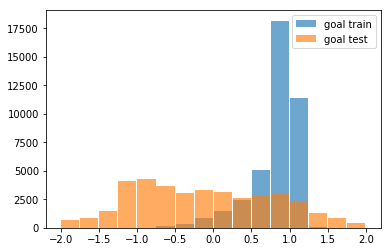

In [16]:
#bins=[-4, -3.5, -3, -2.5, -2, -1.5, -1, 0, 1, 1.5, 2, 2.5, 3, 3.5, 4]
#bins=[-2.5, -2, -1.5, -1, 0, 1, 1.5, 2, 2.5]
#bins=[-1.5, -1.25, -1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1, 1.25, 1.5]
#bins=np.arange(min(aimless), max(aimless) + 0.25, 0.25)
bins=np.arange(-2, 2 + 0.25, 0.25)
plt.hist(goal_train, bins=bins, rwidth=0.95, alpha=0.65, label='goal train')
plt.hist(goal_test, bins=bins, rwidth=0.95, alpha=0.65, label='goal test')
plt.legend(loc='upper right')


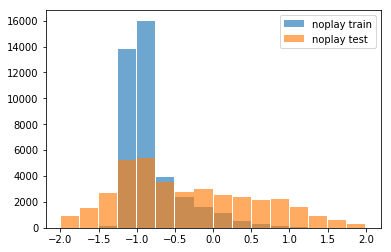

In [17]:
plt.hist(noplay_train, bins=bins, rwidth=0.95, alpha=0.65, label='noplay train')
plt.hist(noplay_test, bins=bins, rwidth=0.95, alpha=0.65, label='noplay test')
plt.legend(loc='upper right')

(array([ 446., 1106., 2261., 5394., 5470., 3978., 3298., 3415., 3062.,
        2529., 2338., 2084., 1513.,  848.,  481.,  308.]),
 array([-2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
         0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ]),
 <a list of 16 Patch objects>)

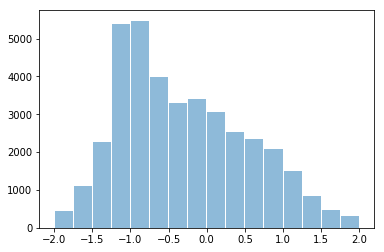

In [18]:
plt.hist(aimless, bins=bins, rwidth=0.95, alpha=0.5, label='aimless test')

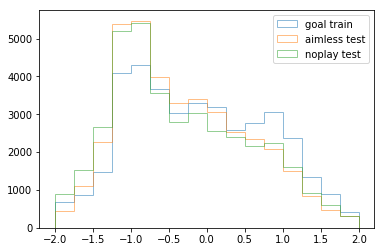

In [19]:
plt.hist(goal_test, bins=bins, rwidth=0.95, alpha=0.5, label='goal train', histtype=u'step')
plt.hist(aimless, bins=bins, rwidth=0.95, alpha=0.5, label='aimless test', histtype=u'step')
plt.hist(noplay_test, bins=bins, rwidth=0.95, alpha=0.5, label='noplay test', histtype=u'step')
plt.legend(loc='upper right')

Now we want histogram plots for each dimension condition.

In [20]:
goaltrain1 = goal_train[0::4]
goaltrain2 = goal_train[1::4]
goaltrain3 = goal_train[2::4]
goaltrain4 = goal_train[3::4]

Text(0.5,1,'4 input dims')

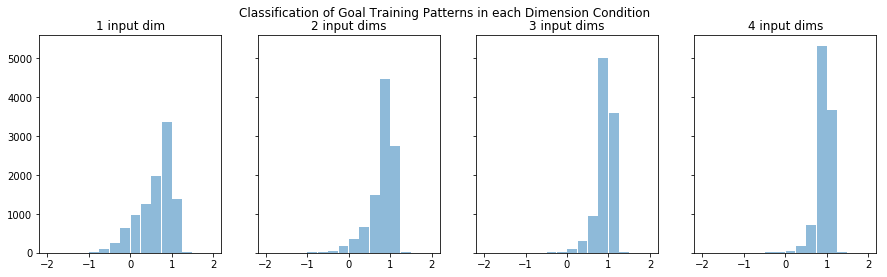

In [21]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(15, 4))
f.suptitle('Classification of Goal Training Patterns in each Dimension Condition')
ax1.hist(goaltrain1, bins=bins, rwidth=0.95, alpha=0.5, label='1 input dim')
ax1.set_title('1 input dim')
ax2.hist(goaltrain2, bins=bins, rwidth=0.95, alpha=0.5, label='2 input dims')
ax2.set_title('2 input dims')
ax3.hist(goaltrain3, bins=bins, rwidth=0.95, alpha=0.5, label='3 input dims')
ax3.set_title('3 input dims')
ax4.hist(goaltrain4, bins=bins, rwidth=0.95, alpha=0.5, label='4 input dims')
ax4.set_title('4 input dims')

In [22]:
goaltest1 = goal_test[0::4]
goaltest2 = goal_test[1::4]
goaltest3 = goal_test[2::4]
goaltest4 = goal_test[3::4]

Text(0.5,1,'4 input dims')

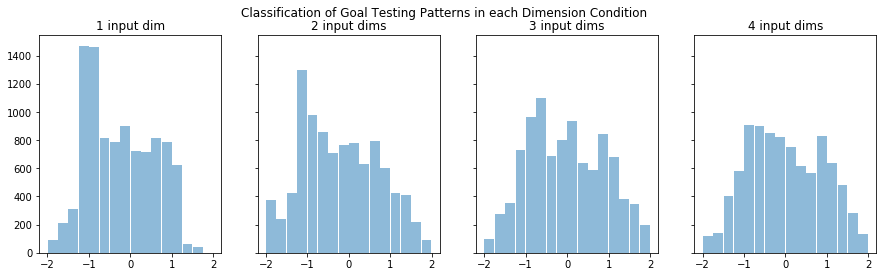

In [23]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(15, 4))
f.suptitle('Classification of Goal Testing Patterns in each Dimension Condition')
ax1.hist(goaltest1, bins=bins, rwidth=0.95, alpha=0.5, label='1 input dim')
ax1.set_title('1 input dim')
ax2.hist(goaltest2, bins=bins, rwidth=0.95, alpha=0.5, label='2 input dims')
ax2.set_title('2 input dims')
ax3.hist(goaltest3, bins=bins, rwidth=0.95, alpha=0.5, label='3 input dims')
ax3.set_title('3 input dims')
ax4.hist(goaltest4, bins=bins, rwidth=0.95, alpha=0.5, label='4 input dims')
ax4.set_title('4 input dims')

In [24]:
noplaytrain1 = noplay_train[0::4]
noplaytrain2 = noplay_train[1::4]
noplaytrain3 = noplay_train[2::4]
noplaytrain4 = noplay_train[3::4]

Text(0.5,1,'4 input dims')

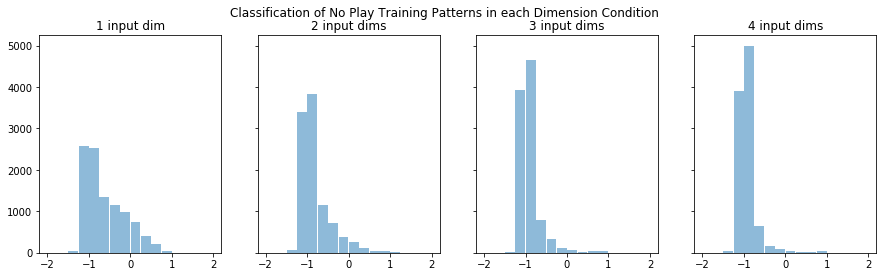

In [25]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(15, 4))
f.suptitle('Classification of No Play Training Patterns in each Dimension Condition')
ax1.hist(noplaytrain1, bins=bins, rwidth=0.95, alpha=0.5, label='1 input dim')
ax1.set_title('1 input dim')
ax2.hist(noplaytrain2, bins=bins, rwidth=0.95, alpha=0.5, label='2 input dims')
ax2.set_title('2 input dims')
ax3.hist(noplaytrain3, bins=bins, rwidth=0.95, alpha=0.5, label='3 input dims')
ax3.set_title('3 input dims')
ax4.hist(noplaytrain4, bins=bins, rwidth=0.95, alpha=0.5, label='4 input dims')
ax4.set_title('4 input dims')

In [26]:
noplaytest1 = noplay_test[0::4]
noplaytest2 = noplay_test[1::4]
noplaytest3 = noplay_test[2::4]
noplaytest4 = noplay_test[3::4]

Text(0.5,1,'4 input dims')

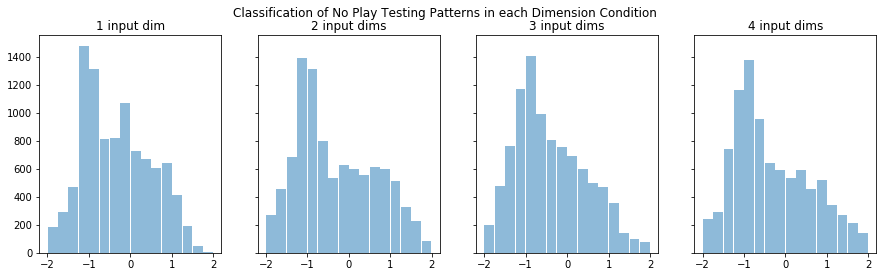

In [27]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(15, 4))
f.suptitle('Classification of No Play Testing Patterns in each Dimension Condition')
ax1.hist(noplaytest1, bins=bins, rwidth=0.95, alpha=0.5, label='1 input dim')
ax1.set_title('1 input dim')
ax2.hist(noplaytest2, bins=bins, rwidth=0.95, alpha=0.5, label='2 input dims')
ax2.set_title('2 input dims')
ax3.hist(noplaytest3, bins=bins, rwidth=0.95, alpha=0.5, label='3 input dims')
ax3.set_title('3 input dims')
ax4.hist(noplaytest4, bins=bins, rwidth=0.95, alpha=0.5, label='4 input dims')
ax4.set_title('4 input dims')

In [28]:
aimless1 = aimless[0::4]
aimless2 = aimless[1::4]
aimless3 = aimless[2::4]
aimless4 = aimless[3::4]

Text(0.5,1,'4 input dims')

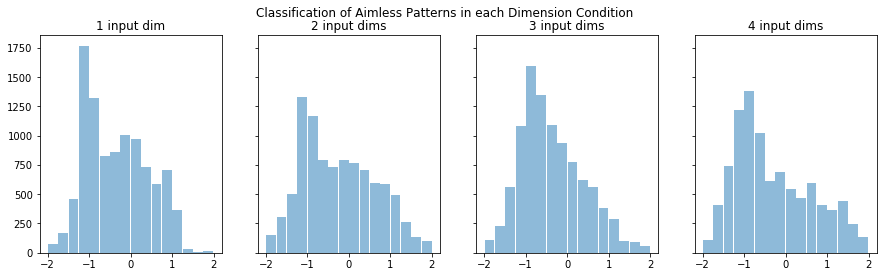

In [29]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(15, 4))
f.suptitle('Classification of Aimless Patterns in each Dimension Condition')
ax1.hist(aimless1, bins=bins, rwidth=0.95, alpha=0.5, label='1 input dim')
ax1.set_title('1 input dim')
ax2.hist(aimless2, bins=bins, rwidth=0.95, alpha=0.5, label='2 input dims')
ax2.set_title('2 input dims')
ax3.hist(aimless3, bins=bins, rwidth=0.95, alpha=0.5, label='3 input dims')
ax3.set_title('3 input dims')
ax4.hist(aimless4, bins=bins, rwidth=0.95, alpha=0.5, label='4 input dims')
ax4.set_title('4 input dims')

Bar charts reporting Average Classification Score for each Pattern Type.

Text(0.5,0,'Number of Dimensions')

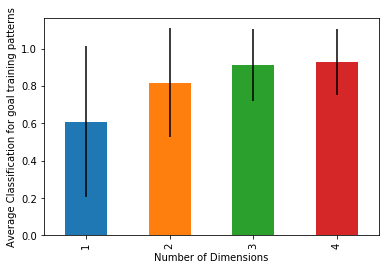

In [30]:
goal_train_class = pd.DataFrame({'1':goaltrain1[:,0],
                          '2':goaltrain2[:,0],
                          '3':goaltrain3[:,0],
                          '4':goaltrain4[:,0]})
goal_test_class = pd.DataFrame({'1':goaltest1[:,0],
                          '2':goaltest2[:,0],
                          '3':goaltest3[:,0],
                          '4':goaltest4[:,0]})
noplay_train_class = pd.DataFrame({'1':noplaytrain1[:,0],
                          '2':noplaytrain2[:,0],
                          '3':noplaytrain3[:,0],
                          '4':noplaytrain4[:,0]})
noplay_test_class = pd.DataFrame({'1':noplaytest1[:,0],
                          '2':noplaytest2[:,0],
                          '3':noplaytest3[:,0],
                          '4':noplaytest4[:,0]})
aimless_class = pd.DataFrame({'1':aimless1[:,0],
                          '2':aimless2[:,0],
                          '3':aimless3[:,0],
                          '4':aimless4[:,0]})

errorsgtr = goal_train_class.std()
errorsgts = goal_test_class.std()
errorsntr = noplay_train_class.std()
errorsnts = noplay_test_class.std()
errorsa = aimless_class.std()

ax = goal_train_class.mean().plot(kind='bar', yerr=errorsgtr)
ax.set_ylabel("Average Classification for goal training patterns")
ax.set_xlabel("Number of Dimensions")


Text(0.5,0,'Number of Dimensions')

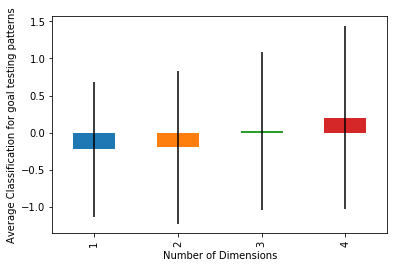

In [31]:
ax = goal_test_class.mean().plot(kind='bar', yerr=errorsgts)
ax.set_ylabel("Average Classification for goal testing patterns")
ax.set_xlabel("Number of Dimensions")

Text(0.5,0,'Number of Dimensions')

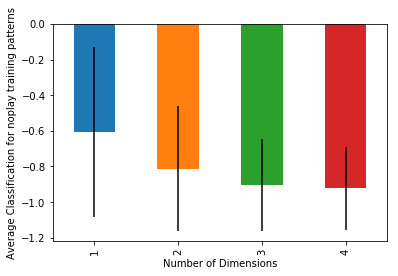

In [32]:
ax = noplay_train_class.mean().plot(kind='bar', yerr=errorsntr)
ax.set_ylabel("Average Classification for noplay training patterns")
ax.set_xlabel("Number of Dimensions")

Text(0.5,0,'Number of Dimensions')

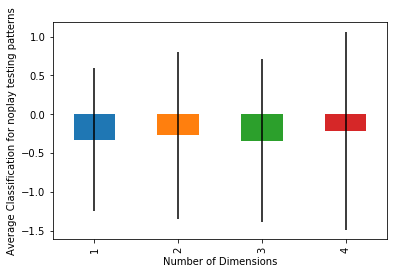

In [33]:
ax = noplay_test_class.mean().plot(kind='bar', yerr=errorsnts)
ax.set_ylabel("Average Classification for noplay testing patterns")
ax.set_xlabel("Number of Dimensions")

Text(0.5,0,'Number of Dimensions')

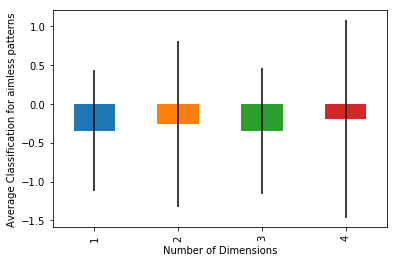

In [34]:
ax = aimless_class.mean().plot(kind='bar', yerr=errorsa)
ax.set_ylabel("Average Classification for aimless patterns")
ax.set_xlabel("Number of Dimensions")

# Pattern Length Experiment

In [35]:
'''import numpy as np
data=data_dims.T
data=data.iloc[100:300]
for i in range(400):  
    v = data[[i]].values
    out = np.concatenate(v).ravel().tolist()
    classify = np.isclose(out, 0, atol=1.0)
    score= np.mean(classify)
    print(score)'''

'import numpy as np\ndata=data_dims.T\ndata=data.iloc[100:300]\nfor i in range(400):  \n    v = data[[i]].values\n    out = np.concatenate(v).ravel().tolist()\n    classify = np.isclose(out, 0, atol=1.0)\n    score= np.mean(classify)\n    print(score)'

In [36]:
data_lens = pd.DataFrame(pytry.read('ICCM_lens'))
#data_lens

In [37]:
result_lens = pd.DataFrame({'training (80%)': pd.concat([data_lens.classify_train]), 'testing (20%)': pd.concat([data_lens.classify_test]), 'aimless': pd.concat([data_lens.classify_aim])})

Text(0.5,0,'Classification Test')

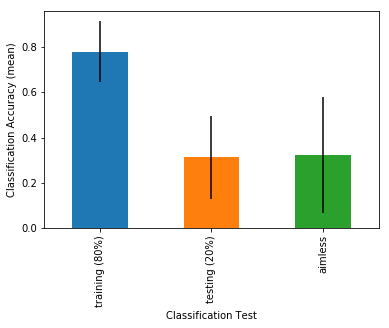

In [38]:
errors = result_lens.std()
lx = result_lens.mean().plot(kind='bar', yerr=errors)
lx.set_ylabel("Classification Accuracy (mean)")
lx.set_xlabel("Classification Test")

Text(0.5,0,'Length of Training Pattern')

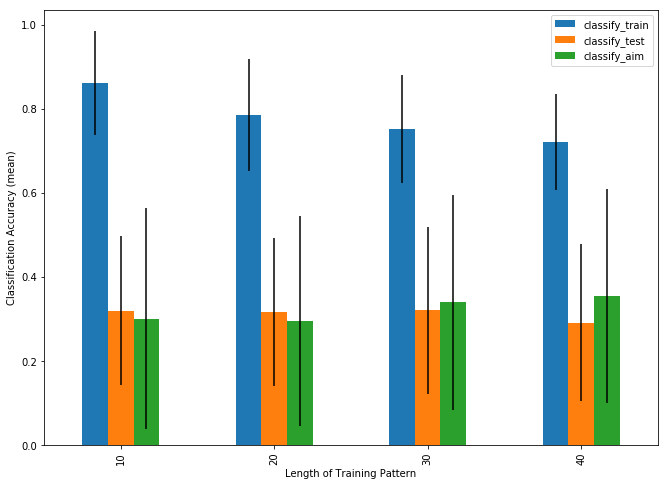

In [39]:
by_len = data_lens.groupby(['len_train'])['classify_train','classify_test','classify_aim'].mean()
by_len_errors = data_lens.groupby(['len_train'])['classify_train','classify_test','classify_aim'].std()

mx = by_len.plot(kind='bar', yerr=by_len_errors, figsize=(11,8)) #plot
mx.set_ylabel("Classification Accuracy (mean)")
mx.set_xlabel("Length of Training Pattern")

In [40]:
axl = pd.DataFrame({'aimless': pd.concat([data_lens.accuracy_aim0, data_lens.accuracy_aim1, data_lens.accuracy_aim2, data_lens.accuracy_aim3,
                                        data_lens.accuracy_aim4, data_lens.accuracy_aim5, data_lens.accuracy_aim6, data_lens.accuracy_aim7, 
                                        data_lens.accuracy_aim8, data_lens.accuracy_aim9, data_lens.accuracy_aim10, data_lens.accuracy_aim11, 
                                        data_lens.accuracy_aim12, data_lens.accuracy_aim13, data_lens.accuracy_aim14, data_lens.accuracy_aim15, 
                                        data_lens.accuracy_aim16, data_lens.accuracy_aim17, data_lens.accuracy_aim18, data_lens.accuracy_aim19, 
                                        data_lens.accuracy_aim20, data_lens.accuracy_aim21, data_lens.accuracy_aim22, data_lens.accuracy_aim23, 
                                        data_lens.accuracy_aim24, data_lens.accuracy_aim25, data_lens.accuracy_aim26, data_lens.accuracy_aim27, 
                                        data_lens.accuracy_aim28, data_lens.accuracy_aim29, data_lens.accuracy_aim30, data_lens.accuracy_aim31, 
                                        data_lens.accuracy_aim32, data_lens.accuracy_aim33, data_lens.accuracy_aim34, data_lens.accuracy_aim35, 
                                        data_lens.accuracy_aim36, data_lens.accuracy_aim37, data_lens.accuracy_aim38, data_lens.accuracy_aim39, 
                                        data_lens.accuracy_aim40, data_lens.accuracy_aim41, data_lens.accuracy_aim42, data_lens.accuracy_aim43, 
                                        data_lens.accuracy_aim44, data_lens.accuracy_aim45, data_lens.accuracy_aim46, data_lens.accuracy_aim47, 
                                        data_lens.accuracy_aim48, data_lens.accuracy_aim49, data_lens.accuracy_aim50, data_lens.accuracy_aim51, 
                                        data_lens.accuracy_aim52, data_lens.accuracy_aim53, data_lens.accuracy_aim54, data_lens.accuracy_aim55, 
                                        data_lens.accuracy_aim56, data_lens.accuracy_aim57, data_lens.accuracy_aim58, data_lens.accuracy_aim59, 
                                        data_lens.accuracy_aim60, data_lens.accuracy_aim61, data_lens.accuracy_aim62, data_lens.accuracy_aim63, 
                                        data_lens.accuracy_aim64, data_lens.accuracy_aim65, data_lens.accuracy_aim66, data_lens.accuracy_aim67, 
                                        data_lens.accuracy_aim68, data_lens.accuracy_aim69, data_lens.accuracy_aim70, data_lens.accuracy_aim71, 
                                        data_lens.accuracy_aim72, data_lens.accuracy_aim73, data_lens.accuracy_aim74, data_lens.accuracy_aim75, 
                                        data_lens.accuracy_aim76, data_lens.accuracy_aim77, data_lens.accuracy_aim78, data_lens.accuracy_aim79, 
                                        data_lens.accuracy_aim80, data_lens.accuracy_aim81, data_lens.accuracy_aim82, data_lens.accuracy_aim83, 
                                        data_lens.accuracy_aim84, data_lens.accuracy_aim85, data_lens.accuracy_aim86, data_lens.accuracy_aim87, 
                                        data_lens.accuracy_aim88, data_lens.accuracy_aim89, data_lens.accuracy_aim90, data_lens.accuracy_aim91, 
                                        data_lens.accuracy_aim92, data_lens.accuracy_aim93, data_lens.accuracy_aim94, data_lens.accuracy_aim95, 
                                        data_lens.accuracy_aim96, data_lens.accuracy_aim97, data_lens.accuracy_aim98, data_lens.accuracy_aim99])})

gtsxl = pd.DataFrame({'goal_test': pd.concat([data_lens.accuracy_test0, data_lens.accuracy_test1, data_lens.accuracy_test2, data_lens.accuracy_test3,
                                        data_lens.accuracy_test4, data_lens.accuracy_test5, data_lens.accuracy_test6, data_lens.accuracy_test7, 
                                        data_lens.accuracy_test8, data_lens.accuracy_test9, data_lens.accuracy_test10, data_lens.accuracy_test11, 
                                        data_lens.accuracy_test12, data_lens.accuracy_test13, data_lens.accuracy_test14, data_lens.accuracy_test15, 
                                        data_lens.accuracy_test16, data_lens.accuracy_test17, data_lens.accuracy_test18, data_lens.accuracy_test19, 
                                        data_lens.accuracy_test20, data_lens.accuracy_test21, data_lens.accuracy_test22, data_lens.accuracy_test23, 
                                        data_lens.accuracy_test24, data_lens.accuracy_test25, data_lens.accuracy_test26, data_lens.accuracy_test27, 
                                        data_lens.accuracy_test28, data_lens.accuracy_test29, data_lens.accuracy_test30, data_lens.accuracy_test31, 
                                        data_lens.accuracy_test32, data_lens.accuracy_test33, data_lens.accuracy_test34, data_lens.accuracy_test35, 
                                        data_lens.accuracy_test36, data_lens.accuracy_test37, data_lens.accuracy_test38, data_lens.accuracy_test39, 
                                        data_lens.accuracy_test40, data_lens.accuracy_test41, data_lens.accuracy_test42, data_lens.accuracy_test43, 
                                        data_lens.accuracy_test44, data_lens.accuracy_test45, data_lens.accuracy_test46, data_lens.accuracy_test47, 
                                        data_lens.accuracy_test48, data_lens.accuracy_test49, data_lens.accuracy_test50, data_lens.accuracy_test51, 
                                        data_lens.accuracy_test52, data_lens.accuracy_test53, data_lens.accuracy_test54, data_lens.accuracy_test55, 
                                        data_lens.accuracy_test56, data_lens.accuracy_test57, data_lens.accuracy_test58, data_lens.accuracy_test59, 
                                        data_lens.accuracy_test60, data_lens.accuracy_test61, data_lens.accuracy_test62, data_lens.accuracy_test63, 
                                        data_lens.accuracy_test64, data_lens.accuracy_test65, data_lens.accuracy_test66, data_lens.accuracy_test67, 
                                        data_lens.accuracy_test68, data_lens.accuracy_test69, data_lens.accuracy_test70, data_lens.accuracy_test71, 
                                        data_lens.accuracy_test72, data_lens.accuracy_test73, data_lens.accuracy_test74, data_lens.accuracy_test75, 
                                        data_lens.accuracy_test76, data_lens.accuracy_test77, data_lens.accuracy_test78, data_lens.accuracy_test79, 
                                        data_lens.accuracy_test80, data_lens.accuracy_test81, data_lens.accuracy_test82, data_lens.accuracy_test83, 
                                        data_lens.accuracy_test84, data_lens.accuracy_test85, data_lens.accuracy_test86, data_lens.accuracy_test87, 
                                        data_lens.accuracy_test88, data_lens.accuracy_test89, data_lens.accuracy_test90, data_lens.accuracy_test91, 
                                        data_lens.accuracy_test92, data_lens.accuracy_test93, data_lens.accuracy_test94, data_lens.accuracy_test95, 
                                        data_lens.accuracy_test96, data_lens.accuracy_test97, data_lens.accuracy_test98, data_lens.accuracy_test99])})

ntsxl = pd.DataFrame({'noplay_test': pd.concat([data_lens.accuracy_test100, data_lens.accuracy_test101, data_lens.accuracy_test102, data_lens.accuracy_test103,
                                        data_lens.accuracy_test104, data_lens.accuracy_test105, data_lens.accuracy_test106, data_lens.accuracy_test107, 
                                        data_lens.accuracy_test108, data_lens.accuracy_test109, data_lens.accuracy_test110, data_lens.accuracy_test111, 
                                        data_lens.accuracy_test112, data_lens.accuracy_test113, data_lens.accuracy_test114, data_lens.accuracy_test115, 
                                        data_lens.accuracy_test116, data_lens.accuracy_test117, data_lens.accuracy_test118, data_lens.accuracy_test119, 
                                        data_lens.accuracy_test120, data_lens.accuracy_test121, data_lens.accuracy_test122, data_lens.accuracy_test123, 
                                        data_lens.accuracy_test124, data_lens.accuracy_test125, data_lens.accuracy_test126, data_lens.accuracy_test127, 
                                        data_lens.accuracy_test128, data_lens.accuracy_test129, data_lens.accuracy_test130, data_lens.accuracy_test131, 
                                        data_lens.accuracy_test132, data_lens.accuracy_test133, data_lens.accuracy_test134, data_lens.accuracy_test135, 
                                        data_lens.accuracy_test136, data_lens.accuracy_test137, data_lens.accuracy_test138, data_lens.accuracy_test139, 
                                        data_lens.accuracy_test140, data_lens.accuracy_test141, data_lens.accuracy_test142, data_lens.accuracy_test143, 
                                        data_lens.accuracy_test144, data_lens.accuracy_test145, data_lens.accuracy_test146, data_lens.accuracy_test147, 
                                        data_lens.accuracy_test148, data_lens.accuracy_test149, data_lens.accuracy_test150, data_lens.accuracy_test151, 
                                        data_lens.accuracy_test152, data_lens.accuracy_test153, data_lens.accuracy_test154, data_lens.accuracy_test155, 
                                        data_lens.accuracy_test156, data_lens.accuracy_test157, data_lens.accuracy_test158, data_lens.accuracy_test159, 
                                        data_lens.accuracy_test160, data_lens.accuracy_test161, data_lens.accuracy_test162, data_lens.accuracy_test163, 
                                        data_lens.accuracy_test164, data_lens.accuracy_test165, data_lens.accuracy_test166, data_lens.accuracy_test167, 
                                        data_lens.accuracy_test168, data_lens.accuracy_test169, data_lens.accuracy_test170, data_lens.accuracy_test171, 
                                        data_lens.accuracy_test172, data_lens.accuracy_test173, data_lens.accuracy_test174, data_lens.accuracy_test175, 
                                        data_lens.accuracy_test176, data_lens.accuracy_test177, data_lens.accuracy_test178, data_lens.accuracy_test179, 
                                        data_lens.accuracy_test180, data_lens.accuracy_test181, data_lens.accuracy_test182, data_lens.accuracy_test183, 
                                        data_lens.accuracy_test184, data_lens.accuracy_test185, data_lens.accuracy_test186, data_lens.accuracy_test187, 
                                        data_lens.accuracy_test188, data_lens.accuracy_test189, data_lens.accuracy_test190, data_lens.accuracy_test191, 
                                        data_lens.accuracy_test192, data_lens.accuracy_test193, data_lens.accuracy_test194, data_lens.accuracy_test195, 
                                        data_lens.accuracy_test196, data_lens.accuracy_test197, data_lens.accuracy_test198, data_lens.accuracy_test199])})


In [41]:
goal_testl = []
for i in range(len(gtsxl)):
    a = gtsxl.iloc[i].values
    b = np.concatenate(a).ravel().tolist()
    goal_testl.append(b)
goal_testl = np.asarray(goal_testl)

noplay_testl = []
for i in range(len(ntsxl)):
    a = ntsxl.iloc[i].values
    b = np.concatenate(a).ravel().tolist()
    noplay_testl.append(b)
noplay_testl = np.asarray(noplay_testl)

aimlessl = []
for i in range(len(axl)):
    a = axl.iloc[i].values
    b = np.concatenate(a).ravel().tolist()
    aimlessl.append(b)
aimlessl = np.asarray(aimlessl)

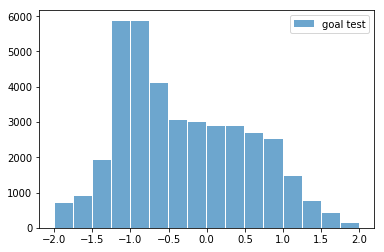

In [42]:
#bins=[-4, -3.5, -3, -2.5, -2, -1.5, -1, 0, 1, 1.5, 2, 2.5, 3, 3.5, 4]
#bins=[-2.5, -2, -1.5, -1, 0, 1, 1.5, 2, 2.5]
#bins=[-1.5, -1.25, -1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1, 1.25, 1.5]
#bins=np.arange(min(aimless), max(aimless) + 0.25, 0.25)
bins=np.arange(-2, 2 + 0.25, 0.25)
plt.hist(goal_testl, bins=bins, rwidth=0.95, alpha=0.65, label='goal test')
plt.legend(loc='upper right')

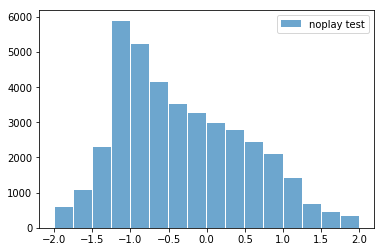

In [43]:
plt.hist(noplay_testl, bins=bins, rwidth=0.95, alpha=0.65, label='noplay test')
plt.legend(loc='upper right')

(array([ 569., 1061., 2081., 5601., 5664., 3926., 3388., 3523., 3262.,
        2712., 2439., 2533., 1524.,  466.,  239.,  153.]),
 array([-2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
         0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ]),
 <a list of 16 Patch objects>)

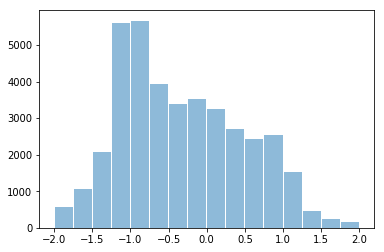

In [44]:
plt.hist(aimlessl, bins=bins, rwidth=0.95, alpha=0.5, label='aimless test')

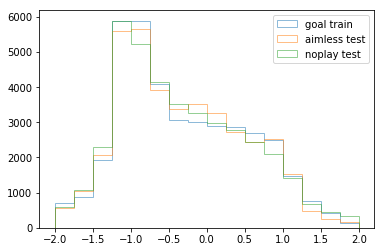

In [45]:
plt.hist(goal_testl, bins=bins, rwidth=0.95, alpha=0.5, label='goal train', histtype=u'step')
plt.hist(aimlessl, bins=bins, rwidth=0.95, alpha=0.5, label='aimless test', histtype=u'step')
plt.hist(noplay_testl, bins=bins, rwidth=0.95, alpha=0.5, label='noplay test', histtype=u'step')
plt.legend(loc='upper right')

In [46]:
goal_testl1 = goal_testl[0::4]
goal_testl2 = goal_testl[1::4]
goal_testl3 = goal_testl[2::4]
goal_testl4 = goal_testl[3::4]

Text(0.5,1,'40 seconds training')

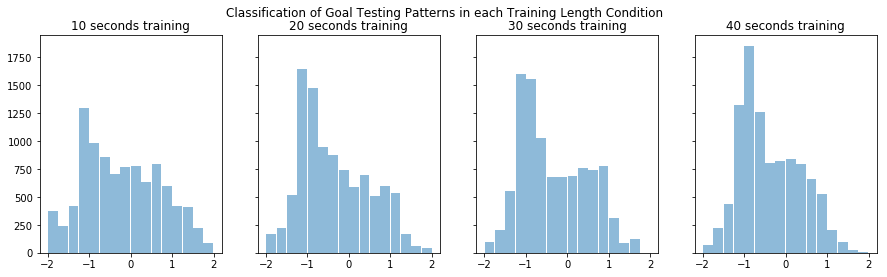

In [47]:
f, (axl1, axl2, axl3, axl4) = plt.subplots(1, 4, sharey=True, figsize=(15, 4))
f.suptitle('Classification of Goal Testing Patterns in each Training Length Condition')
axl1.hist(goal_testl1, bins=bins, rwidth=0.95, alpha=0.5, label='10 seconds training')
axl1.set_title('10 seconds training')
axl2.hist(goal_testl2, bins=bins, rwidth=0.95, alpha=0.5, label='20 seconds training')
axl2.set_title('20 seconds training')
axl3.hist(goal_testl3, bins=bins, rwidth=0.95, alpha=0.5, label='30 seconds training')
axl3.set_title('30 seconds training')
axl4.hist(goal_testl4, bins=bins, rwidth=0.95, alpha=0.5, label='40 seconds training')
axl4.set_title('40 seconds training')

In [48]:
noplay_testl1 = noplay_testl[0::4]
noplay_testl2 = noplay_testl[1::4]
noplay_testl3 = noplay_testl[2::4]
noplay_testl4 = noplay_testl[3::4]

Text(0.5,1,'40 seconds training')

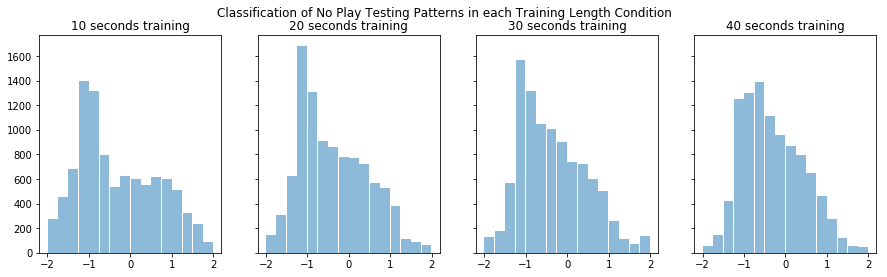

In [49]:
f, (axl1, axl2, axl3, axl4) = plt.subplots(1, 4, sharey=True, figsize=(15, 4))
f.suptitle('Classification of No Play Testing Patterns in each Training Length Condition')
axl1.hist(noplay_testl1, bins=bins, rwidth=0.95, alpha=0.5, label='10 seconds training')
axl1.set_title('10 seconds training')
axl2.hist(noplay_testl2, bins=bins, rwidth=0.95, alpha=0.5, label='20 seconds training')
axl2.set_title('20 seconds training')
axl3.hist(noplay_testl3, bins=bins, rwidth=0.95, alpha=0.5, label='30 seconds training')
axl3.set_title('30 seconds training')
axl4.hist(noplay_testl4, bins=bins, rwidth=0.95, alpha=0.5, label='40 seconds training')
axl4.set_title('40 seconds training')

In [50]:
aimlessl1 = aimlessl[0::4]
aimlessl2 = aimlessl[1::4]
aimlessl3 = aimlessl[2::4]
aimlessl4 = aimlessl[3::4]

Text(0.5,1,'40 seconds training')

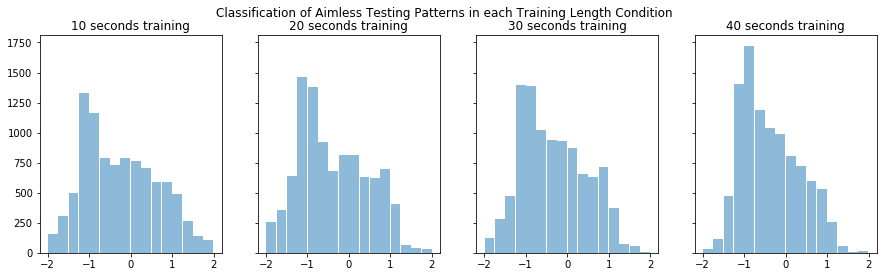

In [51]:
f, (axl1, axl2, axl3, axl4) = plt.subplots(1, 4, sharey=True, figsize=(15, 4))
f.suptitle('Classification of Aimless Testing Patterns in each Training Length Condition')
axl1.hist(aimlessl1, bins=bins, rwidth=0.95, alpha=0.5, label='10 seconds training')
axl1.set_title('10 seconds training')
axl2.hist(aimlessl2, bins=bins, rwidth=0.95, alpha=0.5, label='20 seconds training')
axl2.set_title('20 seconds training')
axl3.hist(aimlessl3, bins=bins, rwidth=0.95, alpha=0.5, label='30 seconds training')
axl3.set_title('30 seconds training')
axl4.hist(aimlessl4, bins=bins, rwidth=0.95, alpha=0.5, label='40 seconds training')
axl4.set_title('40 seconds training')

Bar charts reporting Average Classification Score for each Pattern Type.

Text(0.5,0,'Classification Test')

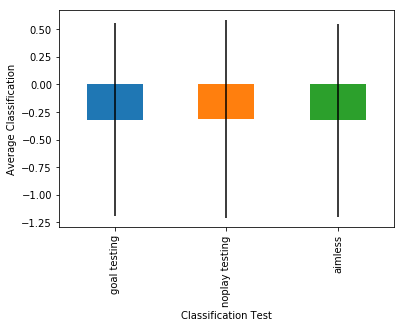

In [52]:
ave_class = pd.DataFrame({'goal testing': pd.concat([gtsxl.goal_test]), 
                          'noplay testing': pd.concat([ntsxl.noplay_test]),
                          'aimless': pd.concat([axl.aimless])})

errors = ave_class.std()
ax = ave_class.mean().plot(kind='bar', yerr=errors)
ax.set_ylabel("Average Classification")
ax.set_xlabel("Classification Test")

Text(0.5,0,'Length of Training Pattern')

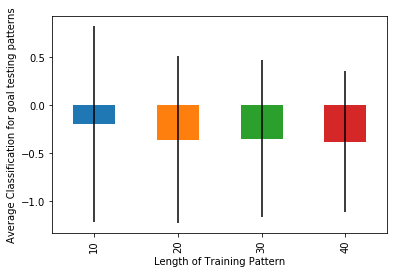

In [53]:
goal_test_class = pd.DataFrame({'10':goal_testl1[:,0],
                          '20':goal_testl2[:,0],
                          '30':goal_testl3[:,0],
                          '40':goal_testl4[:,0]})
noplay_test_class = pd.DataFrame({'10':noplay_testl1[:,0],
                          '20':noplay_testl2[:,0],
                          '30':noplay_testl3[:,0],
                          '40':noplay_testl4[:,0]})
aimless_class = pd.DataFrame({'10':aimlessl1[:,0],
                          '20':aimlessl2[:,0],
                          '30':aimlessl3[:,0],
                          '40':aimlessl4[:,0]})

errorsgts = goal_test_class.std()
errorsnts = noplay_test_class.std()
errorsa = aimless_class.std()

ax = goal_test_class.mean().plot(kind='bar', yerr=errorsgts)
ax.set_ylabel("Average Classification for goal testing patterns")
ax.set_xlabel("Length of Training Pattern")


Text(0.5,0,'Length of Training Pattern')

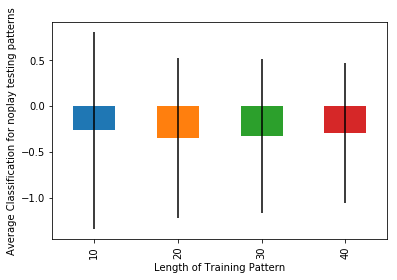

In [54]:
ax = noplay_test_class.mean().plot(kind='bar', yerr=errorsnts)
ax.set_ylabel("Average Classification for noplay testing patterns")
ax.set_xlabel("Length of Training Pattern")

Text(0.5,0,'Length of Training Pattern')

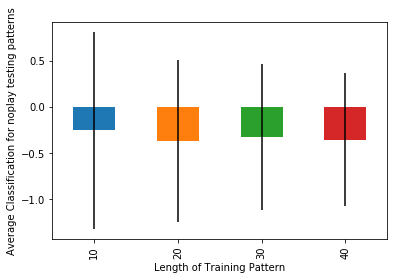

In [55]:
ax = aimless_class.mean().plot(kind='bar', yerr=errorsa)
ax.set_ylabel("Average Classification for noplay testing patterns")
ax.set_xlabel("Length of Training Pattern")

# Experiments Serge Requested

(array([10., 11., 25., 29.,  5.,  2.,  1.,  2.,  2., 13.]),
 array([-1.01927188, -0.81034291, -0.60141394, -0.39248497, -0.183556  ,
         0.02537298,  0.23430195,  0.44323092,  0.65215989,  0.86108886,
         1.07001783]),
 <a list of 10 Patch objects>)

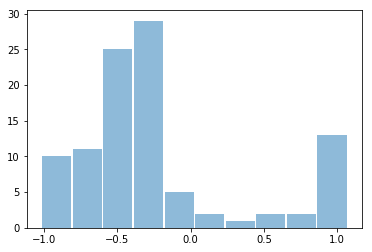

In [56]:
data_5 = pd.DataFrame(pytry.read('len_5'))

len_5 = []
for i in range(len(data_5.T[:100])):
    a = data_5.T[:100].iloc[i].values
    b = np.concatenate(a).ravel().tolist()
    len_5.append(b)
len_5 = np.asarray(len_5)

plt.hist(len_5, rwidth=0.95, alpha=0.5, label='5 seconds training')

(array([ 5., 31.,  9., 27., 19.,  6.,  1.,  0.,  1.,  1.]),
 array([-1.26559378, -1.08870742, -0.91182106, -0.7349347 , -0.55804834,
        -0.38116197, -0.20427561, -0.02738925,  0.14949711,  0.32638347,
         0.50326983]),
 <a list of 10 Patch objects>)

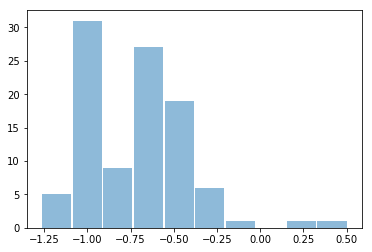

In [57]:
data_5_8 = pd.DataFrame(pytry.read('len_5_dim_8'))

lendim = []
for i in range(len(data_5_8.T[:100])):
    a = data_5_8.T[:100].iloc[i].values
    b = np.concatenate(a).ravel().tolist()
    lendim.append(b)
lendim = np.asarray(lendim)

plt.hist(lendim, rwidth=0.95, alpha=0.5, label='5 seconds training')